<a href="https://colab.research.google.com/github/Goodevil01/Data-Prep-Ca1-/blob/main/Strategic_Thinking_Ca2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard





In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [74]:
df = df = pd.read_csv('/content/drive/MyDrive/BTC-USD.csv')


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
1,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
3,2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700
4,2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800


In [6]:
df.shape

(3104, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3104 non-null   object 
 1   Open       3104 non-null   float64
 2   High       3104 non-null   float64
 3   Low        3104 non-null   float64
 4   Close      3104 non-null   float64
 5   Adj Close  3104 non-null   float64
 6   Volume     3104 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 169.9+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3.104000e+03
mean,14041.039379,14385.041532,13664.743745,14049.414854,14049.414854,1.715624e+10
std,16095.940891,16500.087552,15634.140273,16093.557426,16093.557426,1.962263e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,1.060090e+07
25%,1035.762481,1052.200043,1014.922485,1037.797515,1037.797515,2.255415e+08
50%,8051.509277,8227.814941,7841.081788,8050.035400,8050.035400,1.216461e+10
75%,20629.445801,21144.436035,20235.452637,20648.897949,20648.897949,2.825679e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [9]:
print(df.duplicated().sum())


0


In [10]:
null_values = df.isnull().sum()
print(null_values)


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3104 non-null   datetime64[ns]
 1   Open       3104 non-null   float64       
 2   High       3104 non-null   float64       
 3   Low        3104 non-null   float64       
 4   Close      3104 non-null   float64       
 5   Adj Close  3104 non-null   float64       
 6   Volume     3104 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 169.9 KB


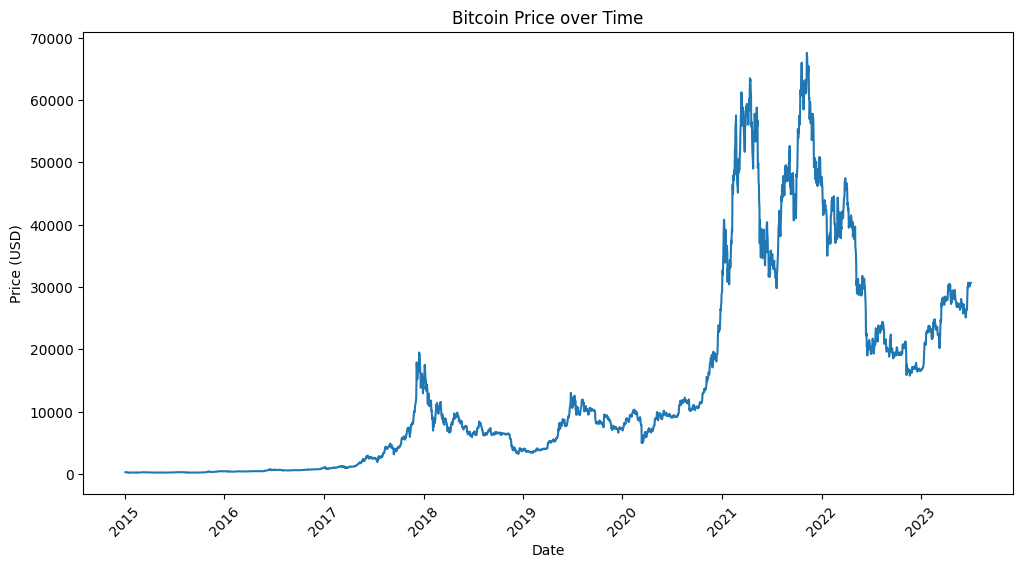

In [13]:
# Visualize Bitcoin price over time using a line plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Bitcoin Price over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

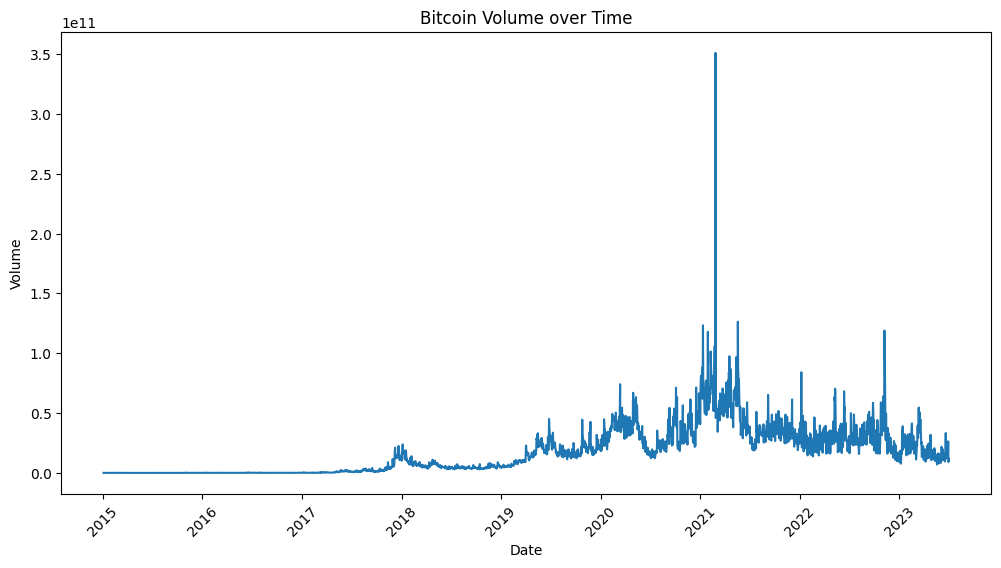

In [14]:
# Visualize Bitcoin volume over time using a line plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'])
plt.title('Bitcoin Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Calculate basic statistics for Bitcoin prices and volumes
price_stats = df['Close'].describe()
volume_stats = df['Volume'].describe()

print("Price Statistics:")
print(price_stats)

print("\nVolume Statistics:")
print(volume_stats)

Price Statistics:
count     3104.000000
mean     14049.414854
std      16093.557426
min        178.102997
25%       1037.797515
50%       8050.035400
75%      20648.897949
max      67566.828125
Name: Close, dtype: float64

Volume Statistics:
count    3.104000e+03
mean     1.715624e+10
std      1.962263e+10
min      1.060090e+07
25%      2.255415e+08
50%      1.216461e+10
75%      2.825679e+10
max      3.509679e+11
Name: Volume, dtype: float64


In [16]:
# Define criteria for bull and bear markets
bull_threshold = 0.1  # Percentage change threshold for bull market (e.g., 10% increase)
bear_threshold = -0.1  # Percentage change threshold for bear market (e.g., 10% decrease)

# Calculate the percentage change in Bitcoin prices
df['Price_Change'] = df['Close'].pct_change()

# Create a new column indicating the market cycle
df['Market_Cycle'] = 'Neutral'  # Initialize all values as 'Neutral'

# Apply the criteria to identify bull and bear markets
df.loc[df['Price_Change'] > bull_threshold, 'Market_Cycle'] = 'Bull'
df.loc[df['Price_Change'] < bear_threshold, 'Market_Cycle'] = 'Bear'

# Print the first few rows of the dataset with the market cycle column
print(df.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2015-01-03  314.846008  315.149994  281.082001  281.082001  281.082001   
1 2015-01-04  281.145996  287.230011  257.612000  264.195007  264.195007   
2 2015-01-05  265.084015  278.341003  265.084015  274.473999  274.473999   
3 2015-01-06  274.610992  287.553009  272.696014  286.188995  286.188995   
4 2015-01-07  286.076996  298.753998  283.079010  294.337006  294.337006   

     Volume  Price_Change Market_Cycle  
0  33054400           NaN      Neutral  
1  55629100     -0.060079      Neutral  
2  43962800      0.038907      Neutral  
3  23245700      0.042682      Neutral  
4  24866800      0.028471      Neutral  


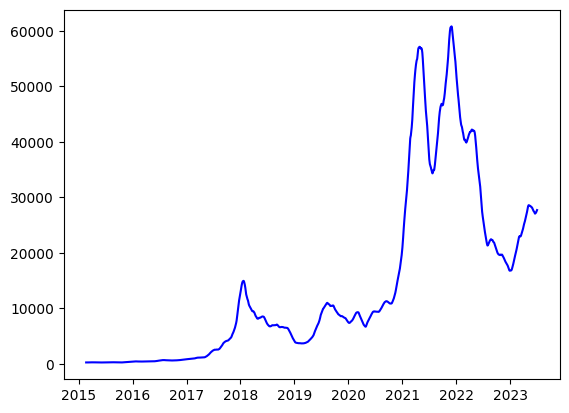

In [17]:
moving_avg = df['Close'].rolling(window=50).mean()
plt.plot(df['Date'], moving_avg, color='blue', label='50-day Moving Average')

# Show the plot
plt.show()


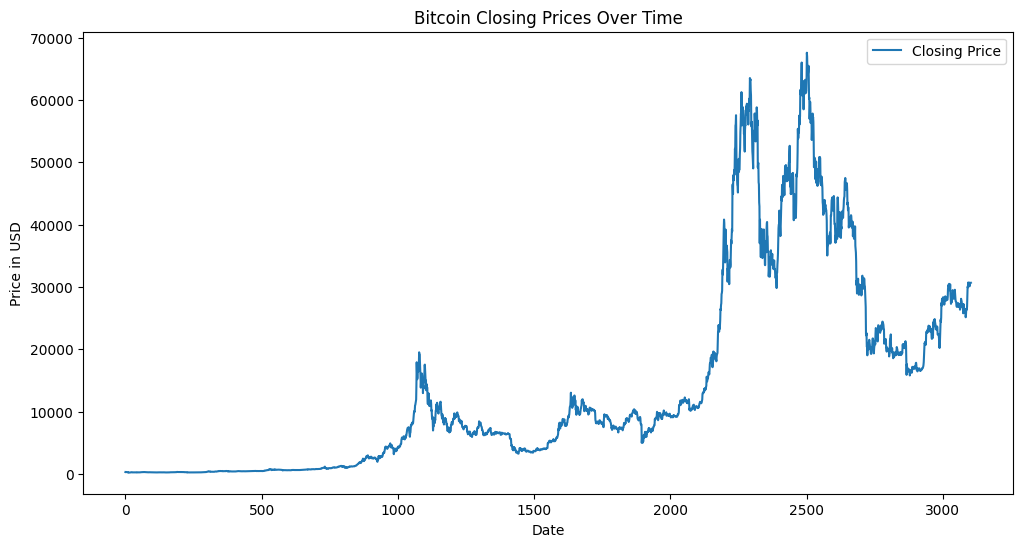

In [18]:
# Plotting the closing prices
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

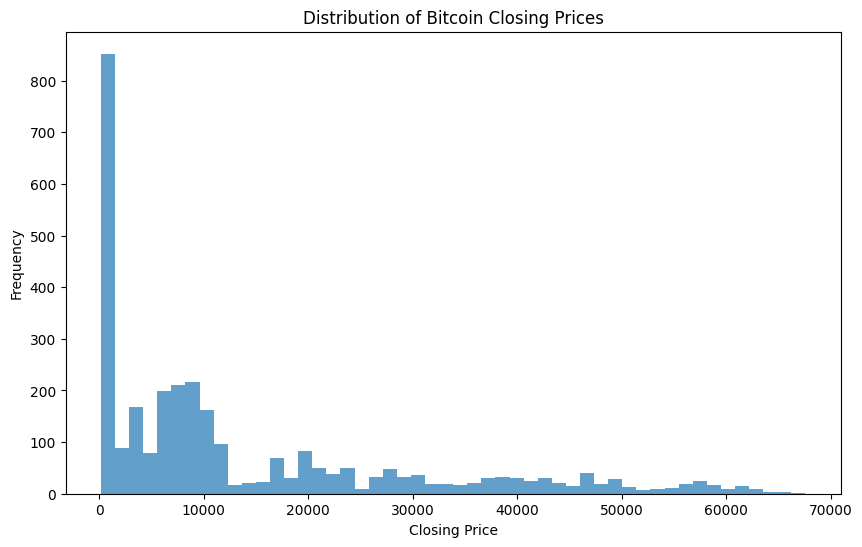

In [19]:
# Plotting a histogram to understand the distribution of closing prices
plt.figure(figsize=(10,6))
plt.hist(df['Close'], bins=50, alpha=0.7)
plt.title('Distribution of Bitcoin Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()


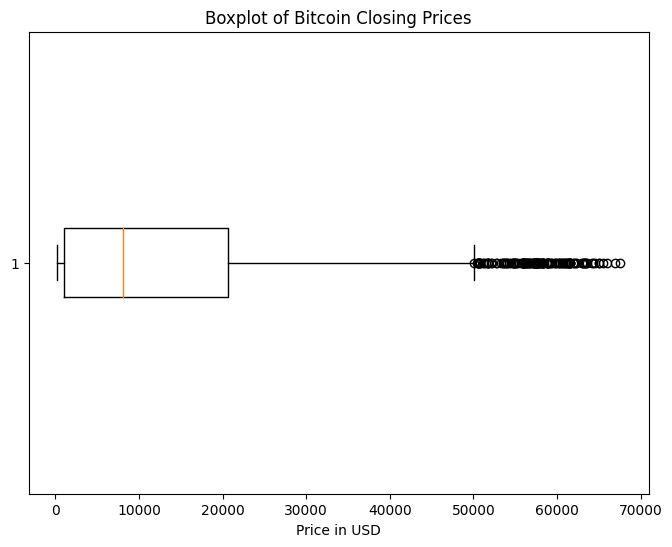

In [20]:
# Using a boxplot to identify outliers in closing prices
plt.figure(figsize=(8,6))
plt.boxplot(df['Close'], vert=False)
plt.title('Boxplot of Bitcoin Closing Prices')
plt.xlabel('Price in USD')
plt.show()

In [21]:
df['Daily_Percent_Change'] = df['Close'].pct_change() * 100  # Multiply by 100 to convert to percentage


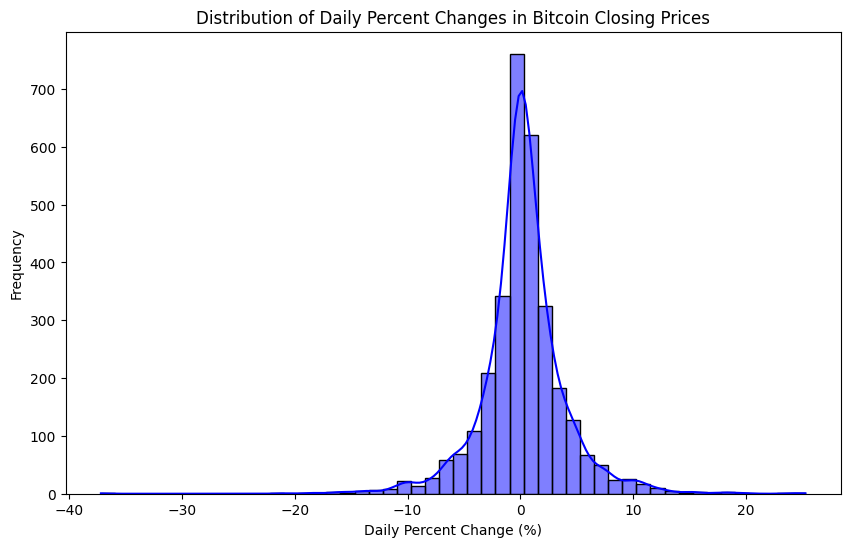

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Percent_Change'].dropna(), bins=50, kde=True, color='blue')  # dropna() to remove NaN values from the plot
plt.title('Distribution of Daily Percent Changes in Bitcoin Closing Prices')
plt.xlabel('Daily Percent Change (%)')
plt.ylabel('Frequency')
plt.show()

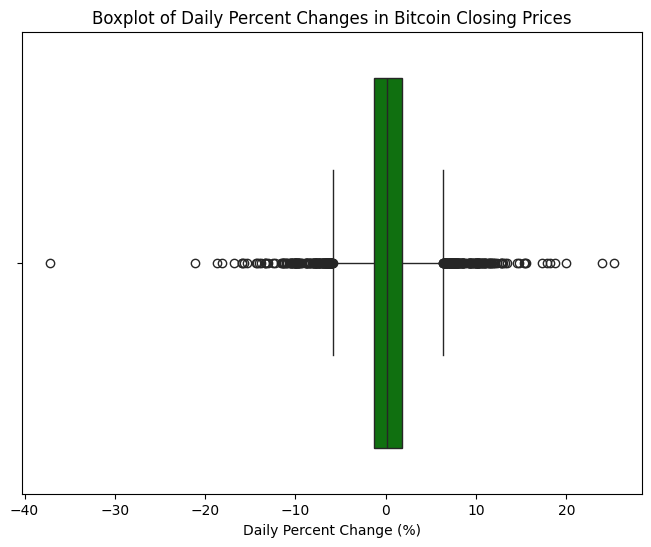

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Daily_Percent_Change'], color='green')
plt.title('Boxplot of Daily Percent Changes in Bitcoin Closing Prices')
plt.xlabel('Daily Percent Change (%)')
plt.show()


In [24]:
# Checking for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:\n', missing_values)

Missing values in each column:
 Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
Price_Change            1
Market_Cycle            0
Daily_Percent_Change    1
dtype: int64


In [25]:
mapping = {'Neutral': 0, 'Bear': -1, 'Bull': 1}  # Adjust mapping as necessary
df['Price_Change'] = df['Price_Change'].replace(mapping)


In [26]:
print(df.info())  # Check data types
print(df.head())  # Inspect the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  3104 non-null   datetime64[ns]
 1   Open                  3104 non-null   float64       
 2   High                  3104 non-null   float64       
 3   Low                   3104 non-null   float64       
 4   Close                 3104 non-null   float64       
 5   Adj Close             3104 non-null   float64       
 6   Volume                3104 non-null   int64         
 7   Price_Change          3103 non-null   float64       
 8   Market_Cycle          3104 non-null   object        
 9   Daily_Percent_Change  3103 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 242.6+ KB
None
        Date        Open        High         Low       Close   Adj Close  \
0 2015-01-03  314.846008  315.149

In [27]:
# Identifying outliers (for example, in the 'Close' column)
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Handling outliers (e.g., capping)
df['Close'] = df['Close'].clip(lower=lower_bound, upper=upper_bound)

In [28]:
# Feature Engineering (e.g., creating a 'Daily Return' feature)
df['Daily Return'] = df['Close'].pct_change()

# Normalizing data (Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Assuming you want to scale 'Close' and 'Volume' columns
df[['Close', 'Volume']] = scaler.fit_transform(df[['Close', 'Volume']])

In [29]:
# Simple Linear Regression: Predicting 'Close' based on 'Volume'
X = df['Volume']  # Predictor variable
y = df['Close']   # Response variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Summary of the model
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     3056.
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        05:21:14   Log-Likelihood:                 351.53
No. Observations:                3104   AIC:                            -699.1
Df Residuals:                    3102   BIC:                            -687.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0837      0.005     16.250      0.0

In [30]:
# Selecting features
X = df[['Open', 'High', 'Low', 'Volume']]  # You can choose other columns as well

# Selecting the target variable
y = df['Close']


In [31]:
df['Close_Lag1'] = df['Close'].shift(1)  # This creates a new column where each row is the previous day's 'Close' price

# Adjusting the features and target variable
X = df[['Open', 'High', 'Low', 'Volume', 'Close_Lag1']].dropna()  # Include the lagged feature
y = df['Close'].shift(-1).dropna()  # Predicting the next day's 'Close' price

In [32]:
 # Random Forest Example
def random_forest_model(X, y):
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the model
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print("Random Forest MSE:", mse)

# Gradient Boosting Example
def gradient_boosting_model(X, y):
    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize Gradient Boosting Regressor
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

    # Fit the model
    gb_model.fit(X_train, y_train)

    # Predict
    y_pred = gb_model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print("Gradient Boosting MSE:", mse)

In [33]:
# LSTM Example
def lstm_model(data, feature_columns, target_column):
    # Preparing data for LSTM
    data = data[feature_columns + [target_column]]
    data_scaled = data.values

    # Generator for the time series
    n_input = 3  # number of steps
    n_features = len(feature_columns)
    generator = TimeseriesGenerator(data_scaled, data_scaled[:, -1], length=n_input, batch_size=1)

    # LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Fit model
    model.fit(generator, steps_per_epoch=1, epochs=200, verbose=1)

    return model

In [34]:

time_steps = 5  # Example: using 5 days of prices to predict the next day
df_lagged = pd.concat([df['Close'].shift(i) for i in range(time_steps, -1, -1)], axis=1)

# Drop missing values created by lagging
df_lagged.dropna(inplace=True)

# Features and labels
X = df_lagged.iloc[:, :-1].values
y = df_lagged.iloc[:, -1].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshaping X for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Scaling the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [35]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
78/78 [==============================] - 6s 9ms/step - loss: 0.0143
Epoch 2/100
78/78 [==============================] - 1s 10ms/step - loss: 5.0602e-04
Epoch 3/100
78/78 [==============================] - 1s 10ms/step - loss: 4.1151e-04
Epoch 4/100
78/78 [==============================] - 1s 8ms/step - loss: 4.1046e-04
Epoch 5/100
78/78 [==============================] - 1s 10ms/step - loss: 3.8111e-04
Epoch 6/100
78/78 [==============================] - 1s 10ms/step - loss: 4.3346e-04
Epoch 7/100
78/78 [==============================] - 1s 9ms/step - loss: 4.1449e-04
Epoch 8/100
78/78 [==============================] - 1s 9ms/step - loss: 3.7677e-04
Epoch 9/100
78/78 [==============================] - 1s 9ms/step - loss: 4.2556e-04
Epoch 10/100
78/78 [==============================] - 1s 12ms/step - loss: 4.1291e-04
Epoch 11/100
78/78 [==============================] - 1s 13ms/step - loss: 3.7950e-04
Epoch 12/100
78/78 [==============================] - 1s 17ms/step - los

20/20 [==============================] - 1s 4ms/step


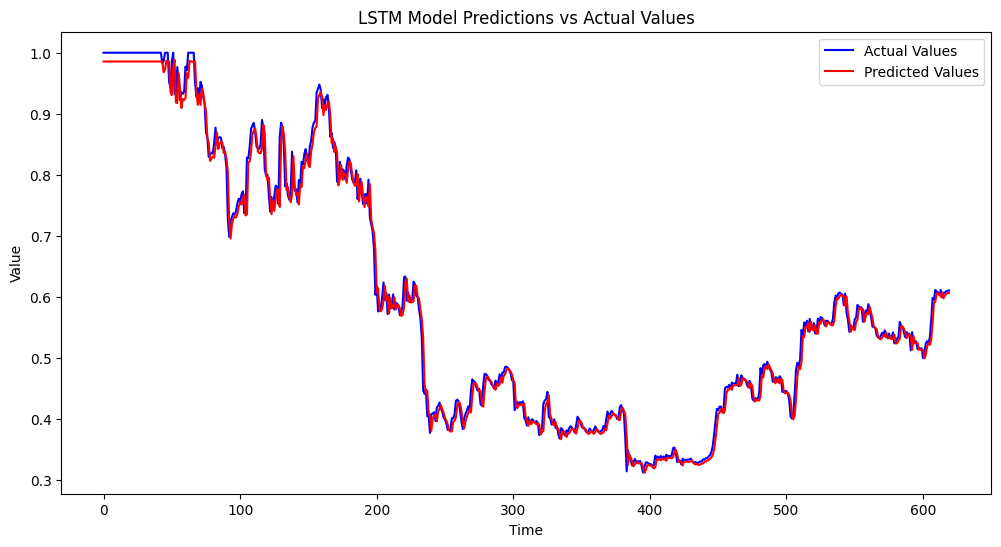

In [36]:
# Assuming 'model' is your trained LSTM model and you have X_test_scaled and y_test ready
# Make predictions
predictions = model.predict(X_test_scaled)

# Visualizing the predictions vs actual values
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='red')
plt.title('LSTM Model Predictions vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [37]:
# Assuming you have the true values 'y_test' and the predictions 'predictions'
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 0.012833389292936294
Mean Squared Error (MSE): 0.0003505860706462439
Root Mean Squared Error (RMSE): 0.01872394377918936


In [38]:
# Create the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Assuming X_train and X_test are your data arrays with shape [samples, time steps, features]
# Reshape to 2D
num_samples, num_time_steps, num_features = X_train.shape
X_train_reshaped = X_train.reshape((num_samples * num_time_steps, num_features))

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_reshaped)

# Transform the test data
num_samples_test, _, _ = X_test.shape
X_test_reshaped = X_test.reshape((num_samples_test * num_time_steps, num_features))
X_test_scaled = scaler.transform(X_test_reshaped)

# Reshape back to 3D
X_train_scaled = X_train_scaled.reshape((num_samples, num_time_steps, num_features))
X_test_scaled = X_test_scaled.reshape((num_samples_test, num_time_steps, num_features))


In [39]:
# Define your LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
62/62 [==============================] - 6s 26ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 2/100
62/62 [==============================] - 1s 12ms/step - loss: 2.2735e-04 - val_loss: 0.0018
Epoch 3/100
62/62 [==============================] - 1s 14ms/step - loss: 2.3812e-04 - val_loss: 0.0015
Epoch 4/100
62/62 [==============================] - 1s 21ms/step - loss: 1.9540e-04 - val_loss: 0.0039
Epoch 5/100
62/62 [==============================] - 1s 19ms/step - loss: 1.9854e-04 - val_loss: 0.0037
Epoch 6/100
62/62 [==============================] - 1s 19ms/step - loss: 1.8426e-04 - val_loss: 0.0101
Epoch 7/100
62/62 [==============================] - 1s 20ms/step - loss: 2.2215e-04 - val_loss: 0.0088
Epoch 8/100
62/62 [==============================] - 1s 19ms/step - loss: 1.8369e-04 - val_loss: 0.0090
Epoch 9/100
62/62 [==============================] - 1s 18ms/step - loss: 1.7587e-04 - val_loss: 0.0128
Epoch 10/100
62/62 [==============================] - 1s 18ms/step -

In [40]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test, verbose=1)

# Calculate evaluation metrics
predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

20/20 [==============================] - 1s 5ms/step


In [41]:
df['Moving_Average'] = df['Close'].rolling(window=5).mean()



20/20 [==============================] - 0s 5ms/step


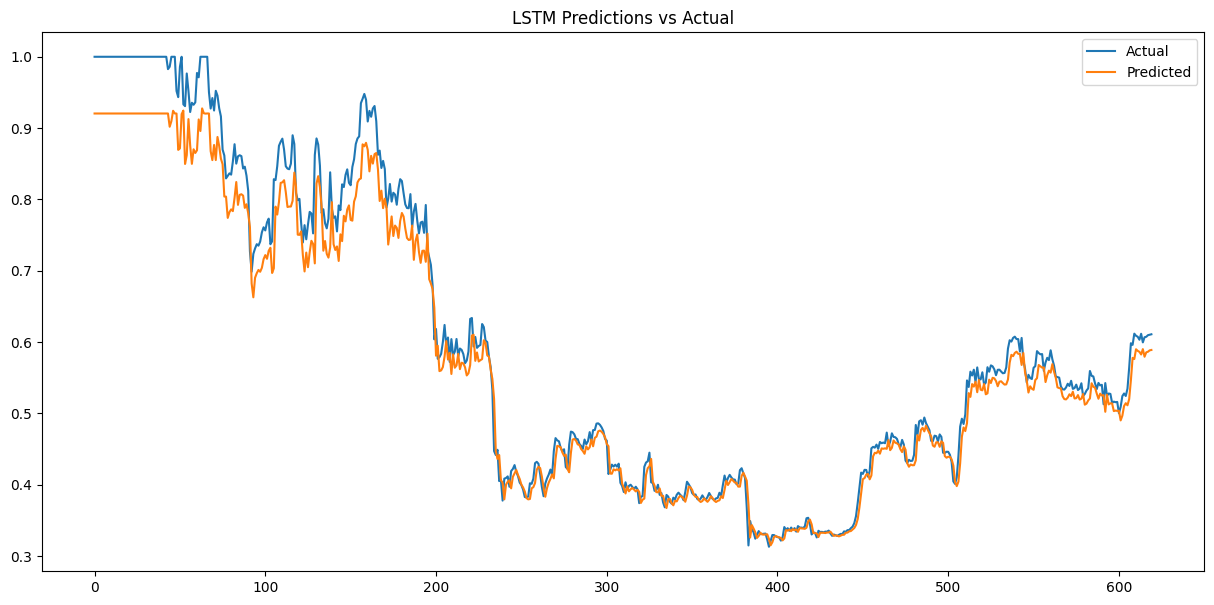

In [42]:
# Predict
predictions = model.predict(X_test_scaled)

# Visualize
plt.figure(figsize=(15, 7))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Predictions vs Actual')
plt.legend()
plt.show()


In [43]:
# Assuming predictions and y_test were scaled
predictions_original = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


In [44]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,  # Keras automatically holds out this fraction of the training data for validation
    verbose=1
)


Epoch 1/100
62/62 [==============================] - 1s 13ms/step - loss: 9.0581e-05 - val_loss: 0.0057
Epoch 2/100
62/62 [==============================] - 1s 13ms/step - loss: 9.5783e-05 - val_loss: 0.0049
Epoch 3/100
62/62 [==============================] - 1s 13ms/step - loss: 1.1034e-04 - val_loss: 0.0061
Epoch 4/100
62/62 [==============================] - 1s 12ms/step - loss: 9.0983e-05 - val_loss: 0.0037
Epoch 5/100
62/62 [==============================] - 1s 12ms/step - loss: 8.4232e-05 - val_loss: 0.0044
Epoch 6/100
62/62 [==============================] - 1s 13ms/step - loss: 9.6821e-05 - val_loss: 0.0035
Epoch 7/100
62/62 [==============================] - 1s 15ms/step - loss: 9.4562e-05 - val_loss: 0.0035
Epoch 8/100
62/62 [==============================] - 1s 16ms/step - loss: 9.7256e-05 - val_loss: 0.0045
Epoch 9/100
62/62 [==============================] - 1s 19ms/step - loss: 9.2919e-05 - val_loss: 0.0049
Epoch 10/100
62/62 [==============================] - 1s 19ms/st

In [45]:
# Assuming y_true are the true labels and y_pred are the model's predictions
y_true = [...]  # replace with actual true labels
y_pred = [...]  # replace with actual predictions


In [46]:
y_true = np.array(y_true, dtype=object)
y_pred = np.array(y_pred, dtype=object)



In [47]:
# Check if they are of equal length
if len(y_true) != len(y_pred):
    raise ValueError("The length of y_true and y_pred must be the same.")


In [48]:
# Check if the input types are numeric or strings and handle accordingly
if np.issubdtype(y_true.dtype, np.number) and np.issubdtype(y_pred.dtype, np.number):
    # If numeric, check for NaN values directly
    if np.isnan(y_true).any() or np.isnan(y_pred).any():
        raise ValueError("NaN values found in input arrays.")
else:
    # If not numeric (e.g., strings), convert to integers using LabelEncoder
    le = LabelEncoder()
    y_true = le.fit_transform(y_true)
    y_pred = le.transform(y_pred)


In [49]:
# Now y_true and y_pred should be numeric, you can safely calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [50]:
# Output the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [51]:
# This step is only necessary if your labels are categorical (e.g., 'yes', 'no')
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

In [52]:
# Replace y_true and y_pred with y_true_encoded and y_pred_encoded if you performed encoding
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')  # or 'macro'/'micro'/'weighted' for multiclass
recall = recall_score(y_true, y_pred, average='binary')  # ditto
f1 = f1_score(y_true, y_pred, average='binary')  # ditto

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [53]:
# Assuming y_true is a numpy array or a list
class_distribution = pd.Series(y_true).value_counts()
print(class_distribution)

0    1
Name: count, dtype: int64


In [54]:
# Print first 10 true and predicted labels
print("True labels:", y_true[:10])
print("Predicted labels:", y_pred[:10])

True labels: [0]
Predicted labels: [0]


In [55]:
# Convert it to numerical form using LabelEncoder if it's not already numerical
if df['Price_Change'].dtype == 'object':
    le = LabelEncoder()
    df['Price_Change'] = le.fit_transform(df['Price_Change'])

# Split data into features and target variable
X = df.drop('Price_Change', axis=1)
y = df['Price_Change']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [56]:
df['Date'] = pd.to_datetime(df['Date']).apply(lambda x: x.timestamp())


In [57]:
# Split data into features and target
X = df.drop('Price_Change', axis=1)
y = df['Price_Change']


In [58]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Initialize the Logistic Regression model
model = LogisticRegression()

In [60]:
# Assuming 'Neutral' is a category in the 'Market_Cycle' column
df = pd.get_dummies(df, columns=['Market_Cycle'])


In [61]:
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Price_Change', 'Daily_Percent_Change', 'Daily Return', 'Close_Lag1',
       'Moving_Average', 'Market_Cycle_Bear', 'Market_Cycle_Bull',
       'Market_Cycle_Neutral'],
      dtype='object')


In [62]:
# Assuming 'Price_Change' is your target variable
target_column_name = 'Price_Change'

# Features selection (excluding the target column and the 'Date' column)
features_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
                    'Daily Return', 'Close_Lag1', 'Moving_Average',
                    'Market_Cycle_Bear', 'Market_Cycle_Bull', 'Market_Cycle_Neutral']

# Split data into features (X) and target (y)
X = df[features_columns]
y = df[target_column_name]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [63]:
import numpy as np

# Check for NaN or infinite values in y_test and y_pred
print("NaN in y_test:", np.isnan(y_test).any())
print("Inf in y_test:", np.isinf(y_test).any())

print("NaN in y_pred:", np.isnan(y_pred).any())
print("Inf in y_pred:", np.isinf(y_pred).any())


NaN in y_test: True
Inf in y_test: False
NaN in y_pred: False
Inf in y_pred: False


In [64]:
# Assuming replacement is appropriate
y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test), posinf=np.max(y_test[np.isfinite(y_test)]), neginf=np.min(y_test[np.isfinite(y_test)]))
y_pred = np.nan_to_num(y_pred, nan=np.nanmean(y_pred), posinf=np.max(y_pred[np.isfinite(y_pred)]), neginf=np.min(y_pred[np.isfinite(y_pred)]))


In [65]:
# Impute missing values with median
imputer = SimpleImputer(strategy='median')

# Create a pipeline that first imputes the data then fits the model
pipeline = make_pipeline(imputer, RandomForestRegressor(random_state=42))

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.7907882541485532e-05
R-squared: 0.978839715611334


In [66]:
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.rand(100)  # 100 target values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate MSE for both sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Training MSE: 0.011647820050978377
Test MSE: 0.1076203336125787


In [67]:
data = {
    'A': np.random.randn(100),
    'B': np.random.randn(100) * 100,
    'C': np.random.rand(100) * 10
}
df = pd.DataFrame(data)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Calculate outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:\n", outliers)


Missing values per column:
 A    0
B    0
C    0
dtype: int64
Outliers per column:
 A    0
B    0
C    0
dtype: int64


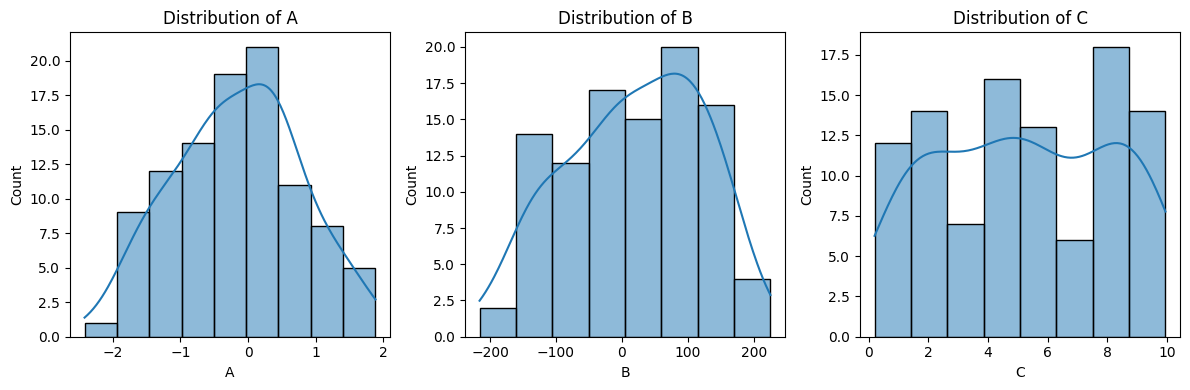

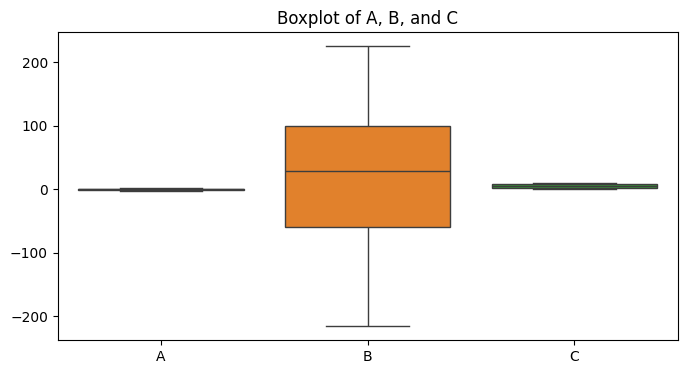

In [68]:
# Histograms for visualizing distributions
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['A'], kde=True)
plt.title('Distribution of A')

plt.subplot(1, 3, 2)
sns.histplot(df['B'], kde=True)
plt.title('Distribution of B')

plt.subplot(1, 3, 3)
sns.histplot(df['C'], kde=True)
plt.title('Distribution of C')
plt.tight_layout()
plt.show()

# Box plots to visualize outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['A', 'B', 'C']])
plt.title('Boxplot of A, B, and C')
plt.show()

In [69]:
Q1 = df['A'].quantile(0.25)
Q3 = df['A'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['A'] >= lower_bound) & (df['A'] <= upper_bound)]


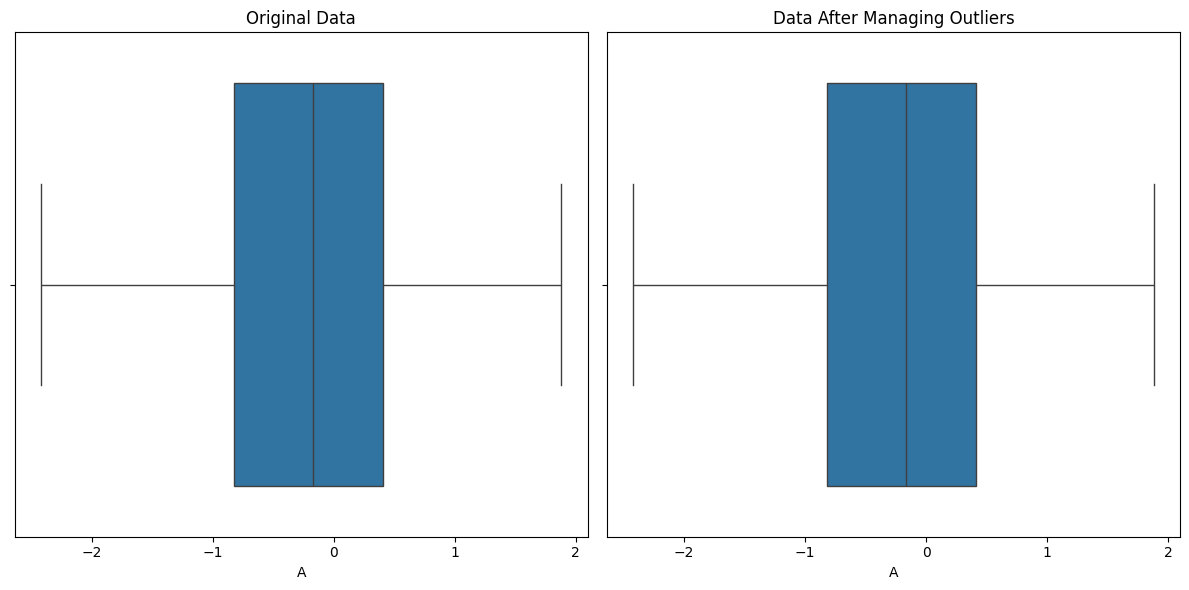

In [70]:
# Original Data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['A'])
plt.title('Original Data')

# Data after handling outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df_filtered['A'] if 'df_filtered' in locals() else df['A'])
plt.title('Data After Managing Outliers')

plt.tight_layout()
plt.show()

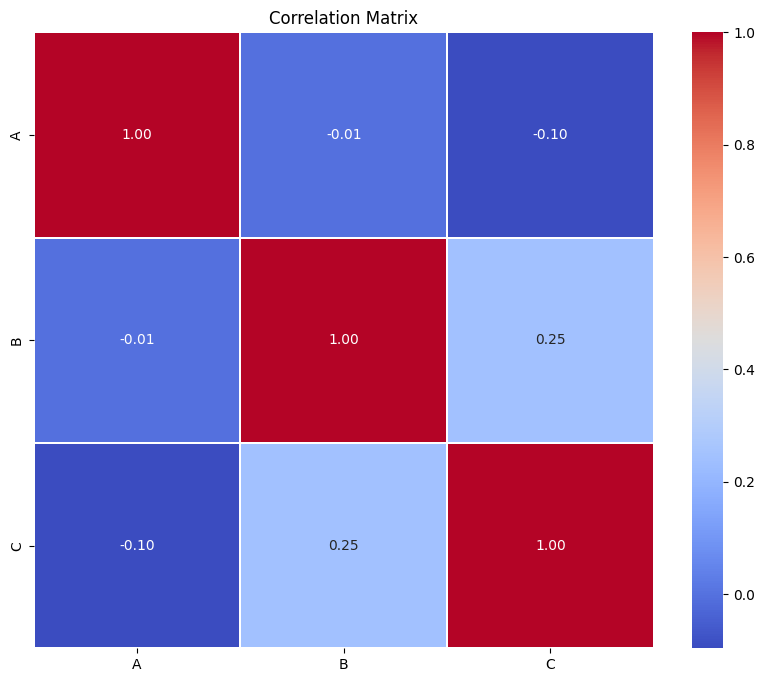

In [71]:
# Assuming df is your DataFrame with relevant Bitcoin data
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix')
plt.show()

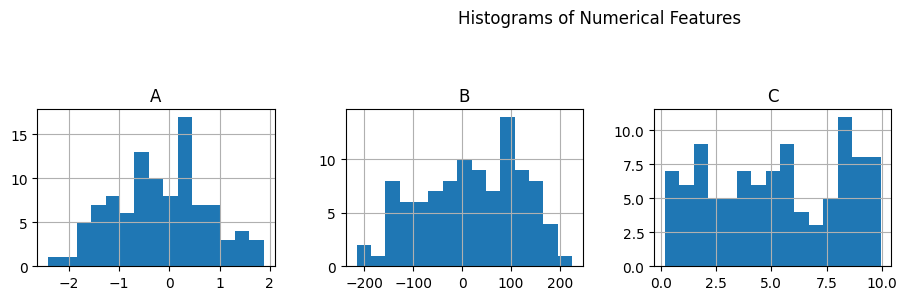

In [72]:
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of Numerical Features')
plt.show()

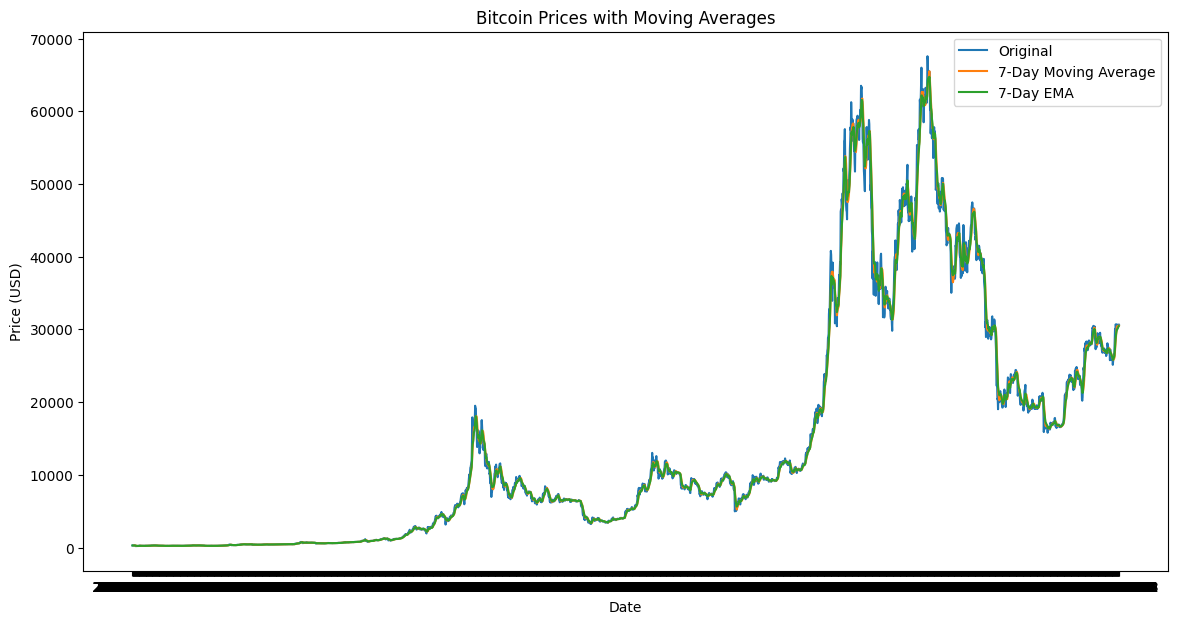

In [75]:
df['Moving_Average_7d'] = df['Close'].rolling(window=7).mean()

# Create an exponential moving average
df['EMA_7d'] = df['Close'].ewm(span=7, adjust=False).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Original')
plt.plot(df['Date'], df['Moving_Average_7d'], label='7-Day Moving Average')
plt.plot(df['Date'], df['EMA_7d'], label='7-Day EMA')
plt.title('Bitcoin Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

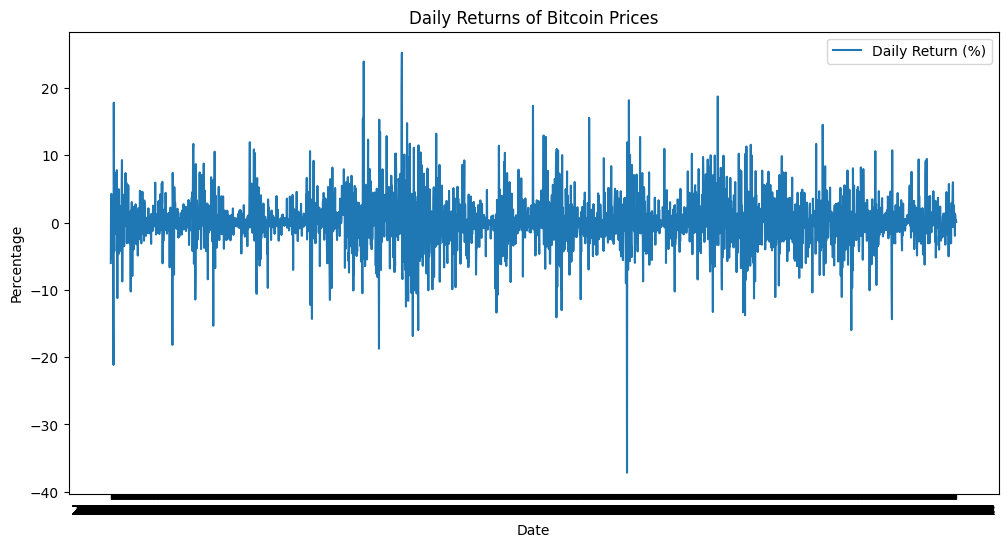

In [76]:
# Daily percentage change
df['Daily_Return'] = df['Close'].pct_change() * 100

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Return'], label='Daily Return (%)')
plt.title('Daily Returns of Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()



In [77]:
# Create lagged features
df['Lag_1'] = df['Close'].shift(1)
df['Lag_2'] = df['Close'].shift(2)

# Drop NaN values that were created due to shifting
df.dropna(inplace=True)


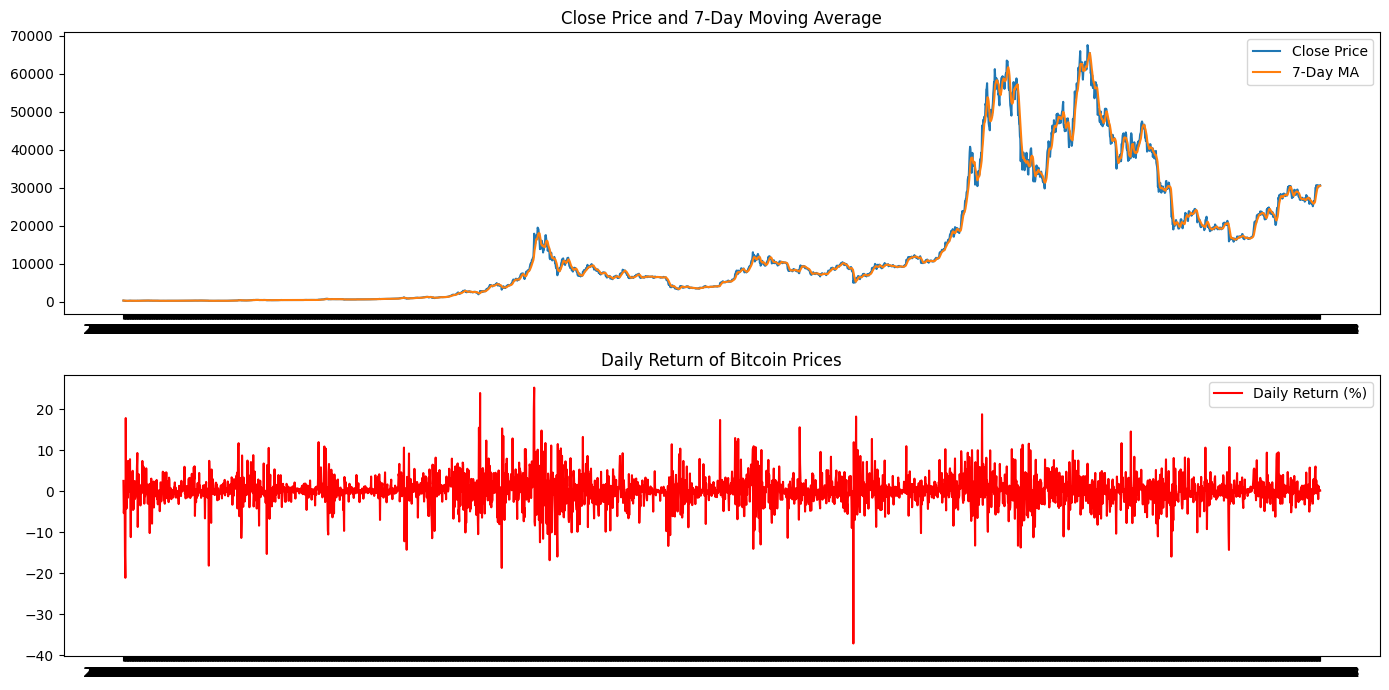

In [78]:
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['Moving_Average_7d'], label='7-Day MA')
plt.title('Close Price and 7-Day Moving Average')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['Date'], df['Daily_Return'], label='Daily Return (%)', color='red')
plt.title('Daily Return of Bitcoin Prices')
plt.legend()
plt.tight_layout()
plt.show()


In [79]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")

Linear Regression MSE: 99016.98182203226


In [108]:

def simple_generator(X_data, y_data, batch_size):
    num_samples = len(X_data)
    while True:  # Loop forever so the generator never terminates
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            X_batch = X_data[offset:offset + batch_size]
            y_batch = y_data[offset:offset + batch_size]

            # Yield the batch to the calling function
            yield (X_batch, y_batch)

# Example usage:
# Assuming X_train and y_train are your data and labels respectively
batch_size = 32
generator = simple_generator(X_train, y_train, batch_size)

# Now you can fit your model using this generator
model.fit(generator, epochs=20, steps_per_epoch=len(X_train) // batch_size)

Epoch 1/20
30/30 [==============================] - 6s 17ms/step - loss: 0.0049
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0087
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0015
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0012
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 5.0312e-04
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 1.2133e-04
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 3.0427e-05
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 3.5291e-05
Epoch 9/20
30/30 [==============================] - 0s 14ms/step - loss: 9.0043e-06
Epoch 10/20
30/30 [==============================] - 0s 11ms/step - loss: 1.1218e-05
Epoch 11/20
30/30 [==============================] - 0s 10ms/step - loss: 1.6714e-05
Epoch 12/20
30/30 [==============================] - 0s 11ms/step - loss: 1.0780e-05
Epoch

In [117]:
# Assuming the total number of samples in your dataset is known and is 10000
# And assuming batch_size is 100
total_samples = 10000
batch_size = 100
steps_per_epoch = total_samples // batch_size

model.fit(generator, epochs=20, steps_per_epoch=steps_per_epoch, callbacks=[cp_callback, tensorboard_callback])


Epoch 1/20
 99/100 [============================>.] - ETA: 0s - loss: 3.2854e-05
Epoch 1: saving model to training_1/cp-0001.ckpt
100/100 [==============================] - 3s 24ms/step - loss: 3.2767e-05
Epoch 2/20
 98/100 [============================>.] - ETA: 0s - loss: 2.2041e-05
Epoch 2: saving model to training_1/cp-0002.ckpt
100/100 [==============================] - 2s 19ms/step - loss: 2.1932e-05
Epoch 3/20
 98/100 [============================>.] - ETA: 0s - loss: 2.8601e-05
Epoch 3: saving model to training_1/cp-0003.ckpt
100/100 [==============================] - 1s 15ms/step - loss: 2.8150e-05
Epoch 4/20
 99/100 [============================>.] - ETA: 0s - loss: 4.0571e-05
Epoch 4: saving model to training_1/cp-0004.ckpt
100/100 [==============================] - 2s 23ms/step - loss: 4.1374e-05
Epoch 5/20
 97/100 [============================>.] - ETA: 0s - loss: 3.8353e-05
Epoch 5: saving model to training_1/cp-0005.ckpt
100/100 [==============================] - 2s 17ms

In [118]:


# Directory for TensorBoard logs
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Checkpoint to save model after each epoch
checkpoint_path = "training_1/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every epoch using save_freq
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1,
                              save_freq='epoch')  # Saves the model at the end of each epoch

# Use callbacks in the fit method
model.fit(generator, epochs=20, callbacks=[cp_callback, tensorboard_callback])




Epoch 1/20
  13149/Unknown - 115s 9ms/step - loss: 8.1042e-05

KeyboardInterrupt: 

In [119]:
#Define LSTM model architecture
model = Sequential([
    LSTM(50, input_shape=(10, 1)),  # Adjust the input_shape based on your data
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Assuming generator is properly defined and used as shown in previous steps
# Train the model using the generator if that's how your data is structured
model.fit(generator, epochs=20)

Epoch 1/20
    264/Unknown - 29s 11ms/step - loss: 0.0134

KeyboardInterrupt: 

In [120]:
# Generate predictions
predicted = model.predict(generator)


   1449/Unknown - 6s 4ms/step

KeyboardInterrupt: 

In [82]:
print(f"Length of true_prices: {len(true_prices)}")
print(f"Length of predicted_prices: {len(predicted_prices)}")


NameError: name 'true_prices' is not defined

In [106]:
# Assuming the sequence length used for predictions was 10
sequence_length = 10

# Adjust the true_prices array to match the predicted_prices array
true_prices_aligned = true_prices[sequence_length:]

# Verify the new lengths match
print(f"Adjusted Length of true_prices: {len(true_prices_aligned)}")
print(f"Length of predicted_prices: {len(predicted_prices)}")

# Calculate MSE with adjusted arrays
mse = mean_squared_error(true_prices_aligned, predicted_prices)
print(f"LSTM MSE: {mse}")


NameError: name 'true_prices' is not defined

In [84]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(10, 1)),  # Increased units
    LSTM(100),  # Additional layer or increased units
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')


In [85]:


# Example data preparation, replace with actual data handling
data = np.array([[i] for i in range(1000)])  # Example data, replace with your actual dataset
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Defining sequence length and preparing data
sequence_length = 10
X_train = []
y_train = []
for i in range(len(data_scaled) - sequence_length):
    X_train.append(data_scaled[i:i + sequence_length])
    y_train.append(data_scaled[i + sequence_length])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Reshape X_train for LSTM input
X_train = X_train.reshape((X_train.shape[0], sequence_length, 1))  # Reshape for LSTM [samples, time steps, features]

print(f"Reshaped X_train size: {X_train.shape}")  # Should print (990, 10, 1)


Reshaped X_train size: (990, 10, 1)


In [86]:


# Define LSTM model architecture
model = Sequential([
    LSTM(50, input_shape=(10, 1)),  # Adjust this to match your data's shape
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
13/13 [==============================] - 3s 62ms/step - loss: 0.2295 - val_loss: 0.4380
Epoch 2/50
13/13 [==============================] - 0s 14ms/step - loss: 0.0383 - val_loss: 7.8354e-04
Epoch 3/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0149 - val_loss: 0.0239
Epoch 4/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0074 - val_loss: 0.0199
Epoch 5/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0037 - val_loss: 4.9629e-04
Epoch 6/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 7/50
13/13 [==============================] - 0s 11ms/step - loss: 8.8243e-04 - val_loss: 3.4513e-04
Epoch 8/50
13/13 [==============================] - 0s 11ms/step - loss: 3.8511e-04 - val_loss: 5.3931e-04
Epoch 9/50
13/13 [==============================] - 0s 13ms/step - loss: 2.3185e-04 - val_loss: 0.0017
Epoch 10/50
13/13 [==============================] - 0s 13ms/step - loss: 1.9731e

In [87]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
13/13 [==============================] - 4s 83ms/step - loss: 1.3430e-04 - val_loss: 6.5148e-04
Epoch 2/50
13/13 [==============================] - 0s 21ms/step - loss: 4.5858e-05 - val_loss: 8.0477e-05
Epoch 3/50
13/13 [==============================] - 0s 20ms/step - loss: 1.6634e-05 - val_loss: 2.5807e-04
Epoch 4/50
13/13 [==============================] - 0s 16ms/step - loss: 8.7916e-06 - val_loss: 3.4343e-04
Epoch 5/50
13/13 [==============================] - 0s 20ms/step - loss: 6.4453e-06 - val_loss: 1.3615e-04
Epoch 6/50
13/13 [==============================] - 0s 17ms/step - loss: 3.8620e-06 - val_loss: 1.6287e-04
Epoch 7/50
13/13 [==============================] - 0s 15ms/step - loss: 3.2642e-06 - val_loss: 1.6929e-04
Epoch 8/50
13/13 [==============================] - 0s 11ms/step - loss: 3.3063e-06 - val_loss: 2.0598e-04
Epoch 9/50
13/13 [==============================] - 0s 13ms/step - loss: 2.8313e-06 - val_loss: 2.1725e-04
Epoch 10/50
13/13 [==================

In [88]:
# Assuming the difference is due to the sequence length used in a TimeseriesGenerator or similar setup
sequence_length = 10  # This should match the sequence length used during prediction generation

# Trim the true_prices to match predicted_prices, assuming predicted_prices lacks initial sequence_length data
true_prices_aligned = true_prices[sequence_length:]

# Now true_prices_aligned should match the length of predicted_prices
mse = mean_squared_error(true_prices_aligned, predicted_prices)
print(f"LSTM MSE: {mse}")


NameError: name 'true_prices' is not defined

In [89]:
mse = mean_squared_error(true_prices_aligned, predicted_prices)
print(f"LSTM MSE: {mse}")


NameError: name 'true_prices_aligned' is not defined

In [90]:

# Assume X_test_array is the array you need to reshape, and it has 2480 points
X_test_array = np.random.rand(2480)  # Example array, replace with your actual data

# Define the sequence length
sequence_length = 10

# Calculate the number of sequences that can fully fit into the dataset
total_sequences = len(X_test_array) // sequence_length

# Ensure the total data is exactly divisible by (total_sequences * sequence_length)
trimmed_data = X_test_array[:total_sequences * sequence_length]

# Reshape the data
X_test_sequences = trimmed_data.reshape(total_sequences, sequence_length, 1)

# Verify the reshaped size and structure
print(f"Reshaped array size: {X_test_sequences.shape}")  # Should print (248, 10, 1)

# If you have a model to predict, use it here
# predicted_values = model.predict(X_test_sequences)


Reshaped array size: (248, 10, 1)


8/8 [==============================] - 0s 4ms/step


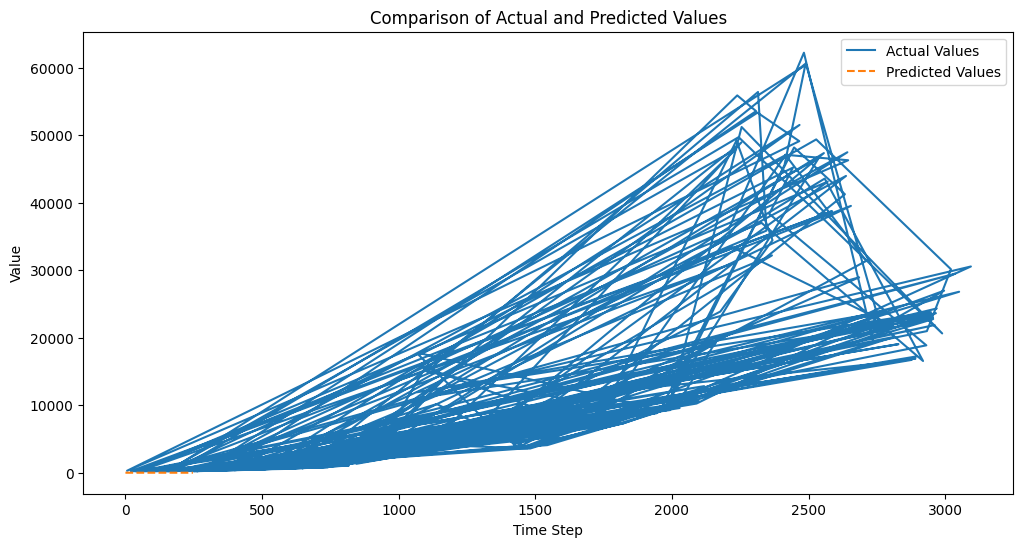

In [91]:
# Assuming 'model' is your pre-trained LSTM model
predicted_values = model.predict(X_test_sequences)

# If you need to process or visualize the predictions, continue with those steps
# For example, visualizing the predicted values against actual values (if you have them)
if 'y_test' in globals() or 'y_test' in locals():
    if len(y_test) >= 248:  # Ensure y_test has at least as many entries as predictions
        actual_values = y_test[:248]  # Adjust this as necessary
        plt.figure(figsize=(12, 6))
        plt.plot(actual_values, label='Actual Values')
        plt.plot(predicted_values.flatten(), label='Predicted Values', linestyle='--')
        plt.title('Comparison of Actual and Predicted Values')
        plt.xlabel('Time Step')
        plt.ylabel('Value')
        plt.legend()
        plt.show()
    else:
        print("Warning: The actual values 'y_test' do not have enough data points for comparison.")
else:
    print("No actual values 'y_test' found for comparison.")


In [92]:

# Assuming actual_values is available and matches the length of predicted_values
mse = mean_squared_error(actual_values, predicted_values.flatten())
mae = mean_absolute_error(actual_values, predicted_values.flatten())
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 434542089.11373943
Mean Absolute Error: 13220.853935004261


In [93]:
# Adjust true_prices to match the exact length of predicted_prices
# If true_prices_aligned is one element too many, trim the last element as well
true_prices_aligned_corrected = true_prices_aligned[:-1]  # Trim the last element

# Now both arrays should have the exact same length
print(f"Corrected Length of true_prices: {len(true_prices_aligned_corrected)}")
print(f"Length of predicted_prices: {len(predicted_prices)}")

# Calculate MSE with the adjusted arrays
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(true_prices_aligned_corrected, predicted_prices)
print(f"LSTM MSE: {mse}")


NameError: name 'true_prices_aligned' is not defined

In [94]:
# Ensure the true_prices and predicted_prices are numpy arrays for easy handling in plotting
true_prices = np.array(true_prices_aligned_corrected)  # Use your aligned and corrected true prices
predicted_prices = np.array(predicted_prices)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(true_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red', linestyle='--')
plt.title('Comparison of Actual and Predicted Prices')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

NameError: name 'true_prices_aligned_corrected' is not defined

In [95]:
# Calculate residuals
residuals = true_prices - predicted_prices

# Plot residuals
plt.figure(figsize=(14, 7))
plt.plot(residuals, label='Residuals', color='green')
plt.title('Residuals of Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()

# Basic statistics of residuals
print("Mean of Residuals:", np.mean(residuals))
print("Standard Deviation of Residuals:", np.std(residuals))


NameError: name 'true_prices' is not defined

In [96]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='gray', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(true_prices, predicted_prices, alpha=0.6)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(true_prices), max(true_prices)], [min(true_prices), max(true_prices)], 'k--')  # Line y=x for reference
plt.show()


NameError: name 'residuals' is not defined

<Figure size 1000x600 with 0 Axes>

In [97]:
# Example of plotting residuals over time to see trends
plt.figure(figsize=(14, 7))
plt.plot(residuals, label='Residuals', color='red')
plt.axhline(y=np.mean(residuals), color='blue', linestyle='--', label='Mean Residual')
plt.title('Residuals Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.legend()
plt.show()


NameError: name 'residuals' is not defined

<Figure size 1400x700 with 0 Axes>

In [98]:
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelation plot of residuals
plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


NameError: name 'residuals' is not defined

In [ ]:
# Example: Adding lagged features
df['Lag_1'] = df['Close'].shift(1)
df['Lag_2'] = df['Close'].shift(2)
df = df.dropna()  # Drop NaN values created by lagging


In [ ]:
df['Differenced'] = df['Close'].diff()  # First difference of the closing price
df = df.dropna()


In [ ]:


# Assuming 'X' has two features (Lag_1, Lag_2)
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

# Assuming 'y' is a single-dimensional array
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))  # Reshape y to make it a 2D array for scaling

# Now prepare input data for LSTM
# If you're using lagged features, make sure to reshape X for LSTM processing
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # Assuming time_step=1 for simplicity

# Define and compile LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(1, X_scaled.shape[2])),  # Adjusted input shape
    Dropout(0.2),
    LSTM(100),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_scaled, y_scaled, epochs=50, batch_size=32, validation_split=0.2)


In [ ]:


# Assuming df is your DataFrame with necessary preprocessing done
X = df[['Lag_1', 'Lag_2']].values
y = df['Close'].values

# Scale the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.transform(y.reshape(-1, 1))

# Prepare input data for LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Define LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(1, X_scaled.shape[2])),
    Dropout(0.2),
    LSTM(100),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_scaled, y_scaled, epochs=50, batch_size=32, validation_split=0.2)


In [ ]:


# Fetch the targets from the generator, convert them to a numpy array, and reshape for inverse transformation
true_prices_scaled = np.array([i[0] for i in generator.targets]).reshape(-1, 1)

# Inverse transform to get back to the original scale of data
true_prices = scaler.inverse_transform(true_prices_scaled)

# Assuming 'predicted' contains your model's predictions, ensure it is also properly reshaped
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))

# Calculate MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(true_prices, predicted_prices)
print(f"LSTM MSE: {mse}")


In [ ]:
# Data scaling for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']].values)  # Reshape if necessary

# Prepare input data for LSTM
sequence_length = 10
generator = TimeseriesGenerator(scaled_data, scaled_data, length=sequence_length, batch_size=1)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(generator, epochs=20, verbose=1)

# Making predictions (for simplicity, using the same generator as training)
predicted = model.predict(generator)
predicted_prices = scaler.inverse_transform(predicted)

# Assuming we have the corresponding true values, calculate MSE
true_prices = scaler.inverse_transform([i[0] for i in generator.targets])
mse = mean_squared_error(true_prices, predicted_prices)
print(f"LSTM MSE: {mse}")

In [ ]:


# Assume `data` is your input array and needs to be processed into sequences
data = np.random.randn(2040)  # Example data, replace with your actual dataset

# Define sequence length
sequence_length = 10

# Calculate the number of sequences that can fully fit into the dataset
total_sequences = len(data) // sequence_length

# Trim data to make sure it can be reshaped without leftovers
data_trimmed = data[:total_sequences * sequence_length]

# Reshape into (number of samples, sequence length, number of features)
X_train = data_trimmed.reshape((total_sequences, sequence_length, 1))

print(f"Reshaped X_train size: {X_train.shape}")


In [ ]:

# Example: Original unprocessed feature and target arrays
data_features = np.random.randn(2482)  # Replace with your actual feature data
data_target = np.random.randn(2482)    # Replace with your actual target data

# Define the sequence length
sequence_length = 10

# Generate input sequences (sliding window)
X_train = np.array([data_features[i:(i + sequence_length)] for i in range(len(data_features) - sequence_length)])
y_train = np.array([data_target[i + sequence_length] for i in range(len(data_target) - sequence_length)])

# Reshape X_train for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Reshape for LSTM [samples, time steps, features]

print(f"X_train shape: {X_train.shape}")  # Should match the LSTM's expected input shape
print(f"y_train shape: {y_train.shape}")  # Should have the same number of samples as X_train


In [ ]:

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(10, 1)),  # 10 time steps, 1 feature per step
    LSTM(50),  # Additional LSTM layer to increase model complexity
    Dense(1)   # Output layer: predicts a single value
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)


In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:


# Data scaling for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])  # Assuming 'C' is the price column

# Prepare input data for LSTM
sequence_length = 10
generator = TimeseriesGenerator(scaled_data, scaled_data, length=sequence_length, batch_size=1)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(generator, epochs=20, verbose=1)

# Making predictions (for simplicity, using the same generator as training)
predicted = model.predict(generator)
predicted_prices = scaler.inverse_transform(predicted)

# Assuming we have the corresponding true values, calculate MSE
true_prices = scaler.inverse_transform([i[0] for i in generator.targets])
mse = mean_squared_error(true_prices, predicted_prices)
print(f"LSTM MSE: {mse}")


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")


In [ ]:
print(df.columns)


In [ ]:
print(X.head())  # Check the first few rows of your features
print(y.head())  # Check the first few rows of your target
